In [211]:
# %load /Users/shleifer/flow/notes/preamble.py
import sys
sys.path = ['/Users/shleifer/flow/kensho-learn/', '/app/', '.'] + sys.path
%load_ext autoreload
%autoreload 2
%matplotlib inline
#from klearn.nb_start import *
%config InlineBackend.figure_format = 'retina'
from lane_lines.nb_start import *

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from sklearn.metrics import roc_curve, roc_auc_score, auc


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
from lane_lines.fit_poly import rgb_read
from detection.window import slide_window

In [13]:
from detection.lesson_functions import *
from detection.utils import *

In [15]:
non_vehicles = glob.glob('non-vehicles/GTI/*')
vehicles = glob.glob('vehicles/*/*')

In [16]:
from lane_lines.viz import plot_side_by_side

In [57]:
y_start_stop = [400, 800]

In [166]:
from sklearn.utils import shuffle

In [456]:
from detection.constants import PARAMS

In [457]:
PARAMS

{'cell_per_block': 2,
 'color_space': 'YCrCb',
 'hist_bins': 32,
 'hog_channel': 'ALL',
 'orient': 9,
 'pix_per_cell': 8,
 'spatial_size': (16, 16)}

In [458]:
%%time
X = [single_img_features(rgb_read(path), **PARAMS) 
     for path in (
    vehicles + non_vehicles)]
Xmat = np.vstack(X)

/Users/shleifer/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


CPU times: user 1min 9s, sys: 3.67 s, total: 1min 13s
Wall time: 1min 19s


In [459]:
import pickle
pickle.dump(Xmat, open('Xmat_darien.pkl', 'wb'))

In [399]:
len(vehicles)

8792

In [403]:
len(non_vehicles)* 2

7800

In [317]:
Xmat[0].shape

(2580,)

In [318]:
y = np.concatenate([np.ones(len(vehicles)),np.zeros(len(non_vehicles))])

In [269]:
rand_state = 42

In [320]:
from sklearn.svm import LinearSVC

In [460]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    Xmat, y, test_size=0.2, random_state=rand_state)


In [492]:
from sklearn.ensemble import GradientBoostingClassifier

In [500]:
clf =  make_pipeline(StandardScaler(), LogisticRegression(random_state=42, n_jobs=-1, class_weight='balanced'))
#clf =  make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=42,))

In [501]:
clf.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [502]:
print('Test Accuracy = ', round(clf.score(X_test, y_test), 4))

Test Accuracy =  0.9878


In [503]:
t=time.time()
n_predict = 10
print('My SVC predicts: ', clf.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

My SVC predicts:  [ 1.  1.  1.  1.  0.  0.  1.  0.  0.  0.]
For these 10 labels:  [ 1.  1.  1.  1.  0.  0.  1.  0.  0.  0.]
0.00285 Seconds to predict 10 labels with SVC


In [465]:
#probas = clf.predict_proba(X_test)[:,1]; np.mean(probas)

In [392]:

fpr, tpr, thresholds = roc_curve(y_test, probas, pos_label=1)

In [397]:
#probas


In [393]:
auc(fpr, tpr)

0.99732338165471335

In [394]:
from sklearn.metrics import *

In [395]:
def confusion_df(clf, y_true, x_test, norm=False):
    '''make a dataframe of confusion matrix
    Args:
        clf: a sklearn classifier which implements predict
        y_true: actual values of y
        x_test: to use to predict
        norm: (default False). if True, normalized rows to sum to 1
    Returns a pandas df which looks like
        Predicted    False   True
        Actual
        False       1005    19
        True        7       100
    '''
    cm = confusion_matrix(y_true, clf.predict(x_test))
    if norm:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm = pd.DataFrame(cm, index=clf.classes_, columns=clf.classes_)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    return cm

In [396]:
confusion_df(clf, y_test, X_test)

Predicted  0.0   1.0
Actual              
0.0        769    17
1.0         39  1714

In [404]:
#non_vehicles

In [326]:
from detection.window import slide_window
image = rgb_read('test_images/test1.jpg')

In [469]:
feat = single_img_features(cv2.resize(image, (64,64)), **PARAMS)

/Users/shleifer/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [472]:
clf.predict(feat.reshape(1,-1))

array([ 0.])

In [473]:
feat.shape

(6156,)

In [470]:
#feat = single_img_features(cv2.resize(image, (64,64)), **PAR

In [295]:
from detection.constants import *

In [420]:

#%history -g slide_window = -l 60

In [429]:
from detection.search_classify import search_windows
from detection.heatmap import get_heatmap, draw_heat

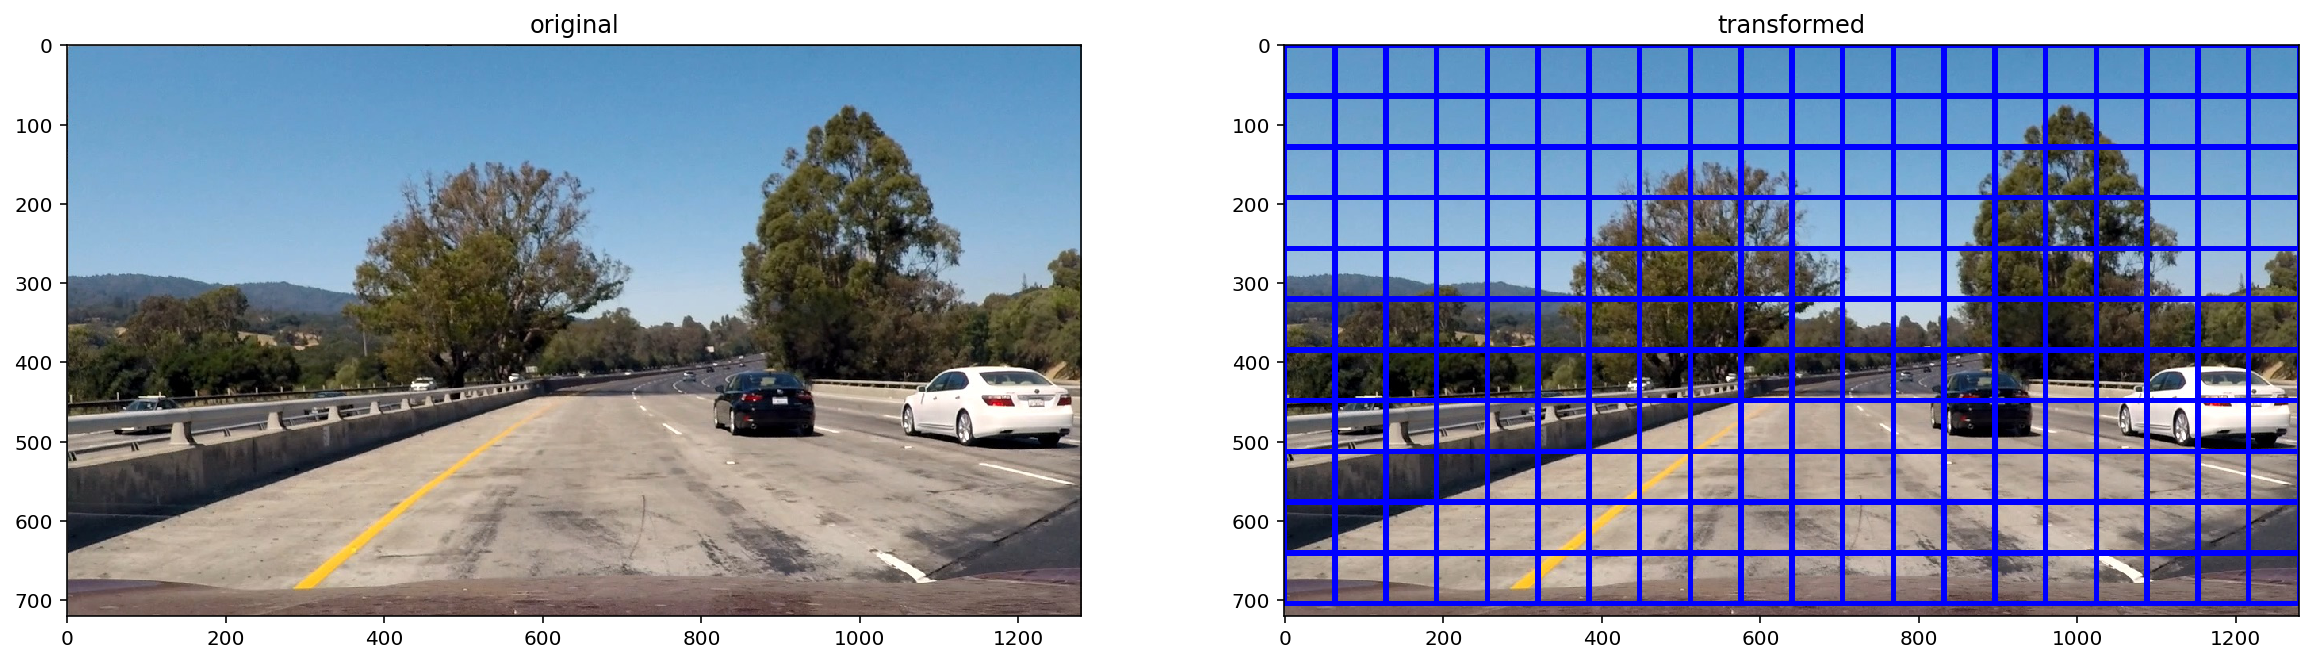

In [409]:

plot_side_by_side(image, draw_boxes(image, windows))

In [504]:
from detection.video import process_image

In [505]:
from detection.window import make_many_windows

In [506]:
test_paths = glob.glob('test_images/*')

test_images/test1.jpg


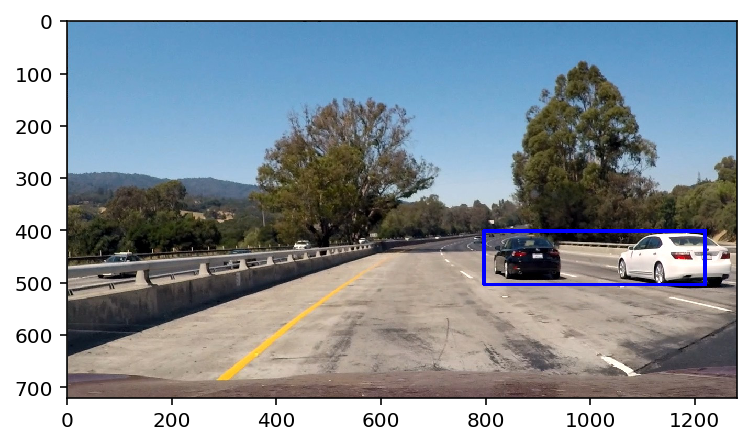

test_images/test2.jpg


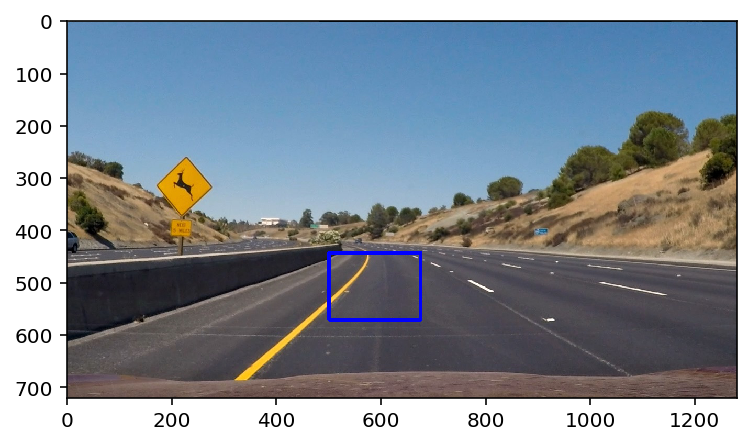

test_images/test3.jpg


test_images/test4.jpg


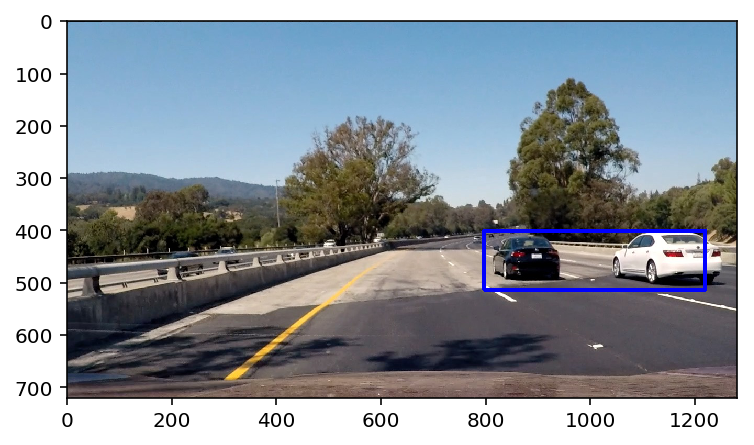

test_images/test5.jpg


test_images/test6.jpg


In [516]:
for path in test_paths:
    print(path)
    plt.imshow(process_image(rgb_read(path),
                             clf, search_params=PARAMS))
    plt.show()

In [517]:
from detection.find_cars import find_cars
from detection.constants import PARAMS
import cv2
from lane_lines.nb_start import *
from detection.lesson_functions import *
from detection.constants import PARAMS

In [533]:
window = windows[0]

In [551]:
 hot_windows = search_windows(image, windows, clf, **PARAMS)

(0,) (89, 159, 2, 2, 9) (64, 64, 3)


ValueError: operands could not be broadcast together with shapes (864,) (6156,) (864,) 

In [549]:
Xmat[0].shape

(6156,)

In [541]:
s1 = slice(window[0][1],window[1][1])
s2 = slice(window[0][0], window[1][0])

In [542]:
plt.imshow(image[s1,  s2])

In [518]:

from detection.find_cars import find_cars

In [524]:
from moviepy.editor import VideoFileClip, ImageSequenceClip


final_output = 'P5_final.mp4'
clip1 = VideoFileClip("project_video.mp4").subclip(0,1)

In [525]:
from detection.video import video_pipeline

In [526]:
%%time
imgs = video_pipeline(clip1, clf)


0it [00:00, ?it/s]
1it [00:01,  1.33s/it]
2it [00:02,  1.26s/it]
25it [00:25,  1.01it/s]

CPU times: user 25.3 s, sys: 219 ms, total: 25.5 s
Wall time: 25.6 s


In [528]:
myvid = ImageSequenceClip(imgs, fps=10)

In [530]:
#myvid.ipython_display()

In [ ]:

#white_clip = clip1.fl_image(save_image)
#plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
%time final_clip.write_videofile(final_output, audio=False)